In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
from PIL import Image
import pandas as pd

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

# imgroot = '/media/senseable-beast/beast-brain-1/Data/streetviewdata/img2/'
# tgtroot = '/media/senseable-beast/beast-brain-1/Data/streetviewdata/img/'
dataroot = 'C:/Users/lezhi/Dropbox/thesis/data/'
tgtroot = 'C:/Users/lezhi/Dropbox/thesis/img/'

In [2]:
cat_labels = ["Sky", "Building", "Pole", "Unlabelled", "Road", \
        "Pavement", "Tree", "SignSymbol", "Fence", \
        "Car", "Pedestrian", "Bicyclist"]

# def getmask(a, **kwargs):
#     inds = [labels.index(c)+243 for c in kwargs['category']]    
#     return [(ele in inds) for ele in np.nditer(a)]

# much better performance than the commented method...:
'''input a 2D index matrix, return a 2D boolean matrix 
where True means the pixel belongs to one of the specified "category".'''

def getmask(a, **kwargs):    
    inds = [cat_labels.index(c)+243 for c in kwargs['category']] 
    # print np.array(inds)-243
    indicators = np.zeros((a.shape[0], a.shape[1], len(inds))).astype(np.uint8)
    for i in range(len(inds)):
        indicators[:,:,i] = np.array(np.squeeze([a==inds[i]]))
    return np.any(indicators, axis=2)

# building visual entropy in ALL images

In [34]:
def iter_dir(rootdir, dostuff):
    emptyfiles = [] 
    
    citynames = np.array(sorted([d for d in os.listdir(rootdir) if os.path.isdir(rootdir)]))
    for cityname in citynames[np.array([1,3,7,9])]:   ######################
        # print cityname
        citypath = rootdir + cityname
        imgnames = sorted([f[:-4] for f in os.listdir(citypath) if os.path.isfile(os.path.join(citypath, f))])
        
        lat_lng_dir = np.array([name.replace('_',',').split(',') for name in imgnames])
        df1 = pd.DataFrame(lat_lng_dir, columns=['lat', 'lng', 'dir']).astype(str) ########################
        df1['city'] = cityname
        
        records = []
    
        for i in range(len(imgnames)): 
            img_filepath = citypath + "/" + imgnames[i] + ".png"
            if os.stat(img_filepath).st_size > 0:                
                image = Image.open(img_filepath) 
                records = records + [dostuff(image)]
            else:
                emptyfiles.append(cityname + "/" + imgnames[i] + ".txt")
        #print records        
        
        df2 = pd.DataFrame(records, columns = ["entropy_mean"]) # change this
                           
        df = pd.concat([df1, df2], axis=1)
        df.to_csv(dataroot+'entropy_'+cityname+'.csv') # change this

In [35]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html
def cal_entropy(im):
    greyIm=np.array(im.convert('L'))

    imarr = np.array(im)
    alpha = imarr[:, :, 3]
    
    mask = getmask(imarr[:,:,3], category=["Building", "SignSymbol", "Pole"])
    if np.sum(mask) < 1000: ################### consider as no building
        return 0
    else: 
        entM = entropy(greyIm, disk(12))
        
        base = (0*np.ones((360,480)))
        base[mask] = entM[mask]      
        # plt.imshow(base, cmap=plt.cm.gray)     

        return np.sum(base) / np.sum(mask)

In [29]:
ima = Image.open(tgtroot+'sanfrancisco/37.713894,-122.444887684_2.png')
cal_entropy(ima)

5.232106772715599

In [36]:
iter_dir(tgtroot, cal_entropy)

## average

In [133]:
ent_df = pd.read_csv(dataroot+'boston_entropy'+'.csv', index_col=0).astype(str)
ent_df[['entropy_mean', 'entropy_std']] = ent_df[['entropy_mean', 'entropy_std']].astype(float)

In [134]:
ent_df#[['entropy_mean', 'entropy_std']].dtype()

,lat,lng,dir,city,entropy_mean,entropy_std
0,42.298631,-71.0830938769,0,boston,4.588960,1.087254
1,42.298631,-71.0830938769,1,boston,4.406891,0.783687
2,42.298631,-71.0830938769,2,boston,4.379765,0.774059
3,42.298631,-71.0830938769,3,boston,4.500667,1.068739
4,42.298631,-71.0851235962,0,boston,4.636681,1.373509
5,42.298631,-71.0851235962,1,boston,4.689493,1.288699
6,42.298631,-71.0851235962,2,boston,4.492624,1.034543
7,42.298631,-71.0851235962,3,boston,4.455707,1.076865
8,42.298631,-71.0871533155,0,boston,NaN,NaN
9,42.298631,-71.0871533155,1,boston,NaN,NaN


In [135]:
entmean = ent_df.groupby(['lat','lng']).agg({'entropy_mean': np.mean, 'entropy_std': np.mean}).reset_index()
entmean.head()

,lat,lng,entropy_mean,entropy_std
0,42.298631,-71.0830938769,4.469071,0.928435
1,42.298631,-71.0851235962,4.568626,1.193404
2,42.298631,-71.0871533155,NaN,NaN
3,42.298631,-71.0891830348,NaN,NaN
4,42.298631,-71.0993316314,NaN,NaN


In [136]:
len(entmean) , len(entmean.dropna())

(3067, 2610)

In [137]:
entmean = entmean.dropna()
entmean.to_csv(dataroot + 'entropy_mean_boston.csv')

# building visual entropy in one image

In [3]:
imarr=Image.open(tgtroot+'sanfrancisco/37.713894,-122.444887684_2.png')

greyIm=imarr.convert('L')

imarr=np.array(imarr)
greyIm=np.array(greyIm)
alpha = imarr[:, :, 3]

(360L, 480L)

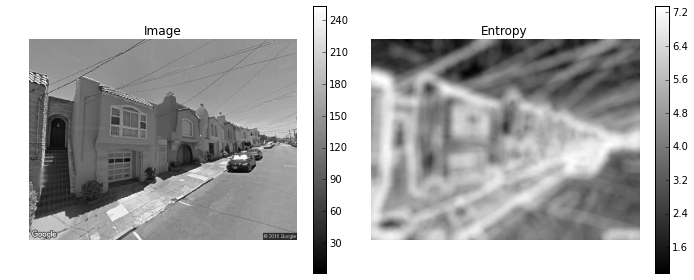

In [7]:
# http://scikit-image.org/docs/dev/auto_examples/filters/plot_entropy.html
image = greyIm
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4), sharex=True,
                               sharey=True,
                               subplot_kw={"adjustable": "box-forced"})
img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

entIm1 = entropy(image, disk(12))
entIm = entIm1# - entIm2
img1 = ax1.imshow(entIm, cmap=plt.cm.gray)
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()
#plt.show(entIm - entIm2)
entIm.shape #, entIm2.shape

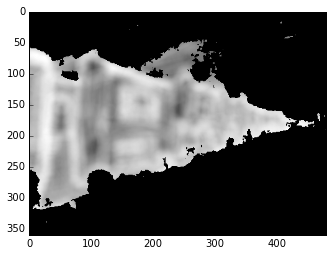

In [8]:
mask = getmask(imarr[:,:,3], category=["Building", "SignSymbol", "Pole"])
base = (0*np.ones((360,480)))
base[mask] = entIm[mask]
plt.imshow(base, cmap=plt.cm.gray)

In [9]:
np.sum(base) / np.sum(mask)

5.232106772715599